# Import packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Settings

In [32]:
control_only = False # Whether only control variables are merged or news signals as well

# Import raw data

In [2]:
## Carbon prices
df = pd.read_csv('../Data/daily_prices.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y %H:%M")
df.set_index('Date',inplace=True)

print(df.head())

            Price
Date             
2017-01-02   6.12
2017-01-03   5.43
2017-01-04   5.72
2017-01-05   5.29
2017-01-06   5.50


In [3]:
df.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-12', '2021-04-13'],
              dtype='datetime64[ns]', name='Date', length=1104, freq=None)

In [4]:
## Oil price
oil_price = pd.read_csv('../Data/Brent Oil Futures Historical Data.csv')
oil_price['Date'] = pd.to_datetime(oil_price['Date'])
oil_price.set_index('Date',inplace=True)
oil_price.sort_index(ascending=True, inplace = True)
print(oil_price.tail())

            Price   Open   High    Low     Vol. Change %
Date                                                    
2021-07-05  77.16  76.23  77.26  75.70  157.22K    1.30%
2021-07-06  74.53  77.06  77.84  74.13  410.70K   -3.41%
2021-07-07  73.43  74.69  75.99  72.60  387.43K   -1.48%
2021-07-08  74.12  73.35  74.40  72.11  314.34K    0.94%
2021-07-09  75.55  74.39  75.80  73.80  248.18K    1.93%


In [5]:
oil_price.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
               '2021-07-02', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', name='Date', length=1167, freq=None)

In [6]:
## Gas price
gas_price = pd.read_csv('../Data/Natural Gas Futures Historical Data.csv')
gas_price['Date'] = pd.to_datetime(gas_price['Date'])
gas_price.set_index('Date',inplace=True)
gas_price.sort_index(ascending=True, inplace = True)

print(gas_price.tail())

            Price   Open   High    Low   Vol. Change %
Date                                                  
2021-07-05  93.22  89.50  94.68  89.50  4.78K    4.81%
2021-07-06  83.54  94.58  94.58  80.61  8.29K  -10.38%
2021-07-07  79.23  81.50  89.20  79.00  5.84K   -5.16%
2021-07-08  82.15  79.63  83.93  76.69  6.89K    3.69%
2021-07-09  90.02  85.60  90.66  85.60  5.86K    9.58%


In [7]:
# Rotterdam Coal Futures Historical Data

coal_price = pd.read_csv('../Data/Rotterdam Coal Futures Historical Data.csv')
coal_price['Date'] = pd.to_datetime(coal_price['Date'])
coal_price.set_index('Date',inplace=True)
coal_price.sort_index(ascending=True, inplace = True)

print(coal_price.tail())

             Price    Open    High     Low   Vol. Change %
Date                                                      
2021-07-05  127.25  127.25  127.25  127.25  0.07K    2.95%
2021-07-06  123.80  123.80  123.80  123.80  0.06K   -2.71%
2021-07-07  124.65  124.25  124.25  124.25  0.07K    0.69%
2021-07-08  125.50  125.00  125.75  124.90  0.10K    0.68%
2021-07-09  126.80  126.80  126.80  126.80  0.02K    1.04%


In [8]:
## Euro stock market price index
euro_stock_market_index = pd.read_csv('../Data/STOXX 600 Historical Data.csv')

euro_stock_market_index['Date'] = pd.to_datetime(euro_stock_market_index['Date'])
# euro_stock_market_index = euro_stock_market_index[['Date', 'Adj Close']]
euro_stock_market_index.set_index('Date',inplace=True)
euro_stock_market_index.sort_index(ascending=True, inplace = True)

euro_stock_market_index.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-02,363.18,361.24,363.76,360.90,117.04M,0.49%
2017-01-03,365.71,364.25,367.07,364.25,262.62M,0.70%
2017-01-04,365.26,365.61,366.19,363.95,230.27M,-0.12%
2017-01-05,365.64,364.02,365.92,363.66,224.31M,0.10%
2017-01-06,365.45,365.07,365.78,364.33,185.54M,-0.05%


In [9]:
# European Renewable Energy Total Return Historical Data
energy_price = pd.read_csv('../Data/European Renewable Energy Total Return Historical Data.csv')
energy_price['Date'] = pd.to_datetime(energy_price['Date'])
# euro_stock_market_index = euro_stock_market_index[['Date', 'Adj Close']]
energy_price.set_index('Date',inplace=True)
energy_price.sort_index(ascending=True, inplace = True)

energy_price.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-07-05,2535.71,2531.29,2543.00,2509.73,-,0.00
2021-07-06,2576.53,2535.83,2585.84,2521.62,-,0.02
2021-07-07,2599.00,2576.52,2628.14,2552.78,-,0.01
2021-07-08,2547.57,2599.99,2599.99,2530.95,-,-0.02
2021-07-09,2517.64,2547.92,2567.41,2494.23,-,-0.01


In [34]:
# Carbon Pulse news signal
if not control_only:
    cp_news_signal = pd.read_csv('../Data/cp_news_signal_2015_11_18_2021_09_03.csv')
    cp_news_signal = cp_news_signal.rename(columns={'date': 'Date'}).set_index('Date')
    print(cp_news_signal)

                pred
Date                
2015-11-18 -0.012647
2015-11-19 -0.012647
2015-11-20 -0.012647
2015-11-23 -0.012647
2015-11-24 -0.012647
...              ...
2021-08-30 -0.012647
2021-08-31 -0.012647
2021-09-01 -0.012647
2021-09-02 -0.012647
2021-09-03 -0.012647

[1498 rows x 1 columns]


# Merge datasets

In [15]:
df = df.merge(oil_price.Price,left_index=True,right_index=True,how='left')

In [16]:
df = df.merge(gas_price.Price,left_index=True,right_index=True,how='left')

In [17]:
df = df.merge(euro_stock_market_index.Price,left_index=True,right_index=True,how='left')

In [18]:
df = df.merge(energy_price.Price,left_index=True,right_index=True,how='left')

In [19]:
df = df.merge(coal_price.Price,left_index=True,right_index=True,how='left')

In [21]:
df = df.merge(cp_news_signal.pred,left_index=True,right_index=True,how='left')

In [22]:
df.tail()

,Price_x,Price_y,Price_x,Price_y,Price_x,Price_y,pred
Date,,,,,,,
2021-04-07,43.76,63.16,47.96,434.32,2573.84,68.80,-0.012647
2021-04-08,43.38,63.20,47.20,436.86,2613.25,67.20,-0.012647
2021-04-09,43.56,62.95,46.86,437.23,2609.93,67.55,-0.012647
2021-04-12,44.39,63.28,49.14,435.24,2552.15,68.35,-0.012647
2021-04-13,43.76,63.67,48.60,435.75,2568.57,68.85,-0.012647


In [23]:
df.columns = ['carbon_price', 'oil_price', 'gas_price', 'stock_market_index_level',
              'energy_price', 'coal_price', 'news_signal']

In [24]:
# Handle non-numeric values
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]

In [25]:
df.head()

,carbon_price,oil_price,gas_price,stock_market_index_level,energy_price,coal_price,news_signal
Date,,,,,,,
2017-01-02,6.12,56.82,NaN,363.18,NaN,NaN,NaN
2017-01-03,5.43,55.47,49.45,365.71,NaN,82.50,-0.012647
2017-01-04,5.72,56.46,50.68,365.26,NaN,84.20,-0.012647
2017-01-05,5.29,56.89,50.69,365.64,NaN,85.75,-0.012647
2017-01-06,5.50,57.10,49.77,365.45,NaN,84.75,-0.012647


/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


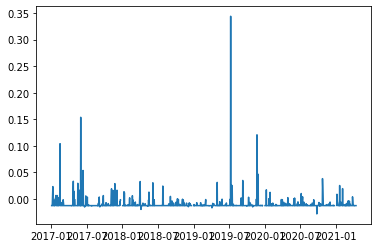

In [28]:
plt.plot(df.news_signal)

# Data preprocessing (ffill etc)

# Export result

In [35]:
if control_only:
    df.to_csv('../Data/merged_dataset.csv',index=True)
    print("Control-only")
else:
    df.to_csv('../Data/merged_signal_dataset.csv',index=True)
    print("News signal as well")

News signal as well


# Support

In [30]:
pd.read_csv('../Data/merged_signal_dataset.csv', index_col=0).head()

,carbon_price,oil_price,gas_price,stock_market_index_level,energy_price,coal_price,news_signal
Date,,,,,,,
2017-01-02,6.12,56.82,NaN,363.18,NaN,NaN,NaN
2017-01-03,5.43,55.47,49.45,365.71,NaN,82.50,-0.012647
2017-01-04,5.72,56.46,50.68,365.26,NaN,84.20,-0.012647
2017-01-05,5.29,56.89,50.69,365.64,NaN,85.75,-0.012647
2017-01-06,5.50,57.10,49.77,365.45,NaN,84.75,-0.012647


In [31]:
pd.read_csv('../Data/merged_signal_dataset.csv', index_col=0).tail()

,carbon_price,oil_price,gas_price,stock_market_index_level,energy_price,coal_price,news_signal
Date,,,,,,,
2021-04-07,43.76,63.16,47.96,434.32,2573.84,68.80,-0.012647
2021-04-08,43.38,63.20,47.20,436.86,2613.25,67.20,-0.012647
2021-04-09,43.56,62.95,46.86,437.23,2609.93,67.55,-0.012647
2021-04-12,44.39,63.28,49.14,435.24,2552.15,68.35,-0.012647
2021-04-13,43.76,63.67,48.60,435.75,2568.57,68.85,-0.012647
